In [68]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

installables

conda install -c anaconda python-graphviz

conda install -c anaconda pydot

conda config --add channels conda-forge

conda install pydotplus

In [69]:
data = pd.read_csv("winequality_red.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [71]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [72]:
X = data.drop('quality', axis=1)
y = data['quality']

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [74]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
feature_name = list(X.columns)
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [76]:
class_names = list(y_train.unique())
class_names

[7, 5, 3, 6, 4, 8]

In [77]:
class_ = y.unique()
class_

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [32]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [78]:
clf.score(X_train,y_train)

1.0

In [79]:
clf.score(X_test,y_test)

0.6354166666666666

# conclusion: This model clf performs best

# Using GridSearchCV hyper-parameters

In [80]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [81]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1,verbose = 3)

In [82]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 6672 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 16912 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 23568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 31248 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 36256 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 40480 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 43200 out of 43200 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [46]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 22, 'min_samples_leaf': 8, 'min_samples_split': 3, 'splitter': 'random'}


In [49]:
clf_1 = DecisionTreeClassifier(criterion = 'gini', max_depth =22, min_samples_leaf= 8, min_samples_split= 3, splitter ='random')
clf_1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=22, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [50]:
clf_1.score(X_test,y_test)

0.5770833333333333

# conclusion: This model clf_1 doesnt perform well

# Trying PCA to reduce dimensions and then create the model

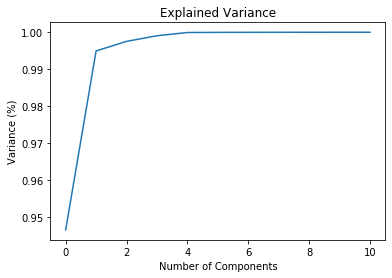

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

We can see that just 4 components explains almost 99% variance so we will use 4 components instead of 11 columns

In [56]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(X)

principal_X = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])
principal_X.head()

PC-1      PC-2      PC-3      PC-4
0 -13.224905 -2.023900 -1.126821 -0.399233
1  22.037724  4.408322 -0.310378 -0.199938
2   7.162673 -2.501461 -0.581868 -0.219069
3  13.430063 -1.951122  2.634040 -1.574059
4 -13.224905 -2.023900 -1.126821 -0.399233

In [57]:
X_train,X_test,y_train,y_test = train_test_split(principal_X,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf_2 = DecisionTreeClassifier()
clf_2.fit(X_train,y_train)
clf_2.score(X_test,y_test)

0.55

In [59]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}
grid_search_1 = GridSearchCV(estimator=clf_2,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [60]:
grid_search_1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [61]:
best_parameters = grid_search_1.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 24, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [63]:
grid_search_1.best_score_

0.5451473414477899

In [64]:
clf_2 = DecisionTreeClassifier(criterion = 'gini', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='best')
clf_2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
clf_2.score(X_test,y_test)

0.5458333333333333

# conclusion: This model clf_2 doesnt perform well

# Though clf_2 performs worst, since it also involves PCA we will save this model just to play with another layer of complexity

In [67]:
import pickle

with open('finalized_model_Decision_Tree.pickle', 'wb') as f:
    pickle.dump(clf_2,f)
with open('pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)    

In [83]:
dict_pred = {
    "data":
    {
        "fixed acidity":"10.4",
        "volatile acidity":"0.9",
        "citric acid":"0.12",
        "residual sugar":"2.0",
        "chlorides":"0.065",
        "free sulfur dioxide":"22",
        "total sulfur dioxide":"65",
        "density":"0.9975",
        "pH":"3.35",
        "sulphates":"0.71",
        "alcohol": "10.0"
    }
}

In [84]:
dict_pred

{'data': {'fixed acidity': '10.4',
  'volatile acidity': '0.9',
  'citric acid': '0.12',
  'residual sugar': '2.0',
  'chlorides': '0.065',
  'free sulfur dioxide': '22',
  'total sulfur dioxide': '65',
  'density': '0.9975',
  'pH': '3.35',
  'sulphates': '0.71',
  'alcohol': '10.0'}}

In [95]:
pd.DataFrame(dict_pred["data"], index = [1])

fixed acidity volatile acidity citric acid residual sugar chlorides  \
1          10.4              0.9        0.12            2.0     0.065   

  free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  
1                  22                   65  0.9975  3.35      0.71    10.0

In [96]:
pd.DataFrame(dict_pred["data"], index = [1,])

fixed acidity volatile acidity citric acid residual sugar chlorides  \
1          10.4              0.9        0.12            2.0     0.065   

  free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  
1                  22                   65  0.9975  3.35      0.71    10.0

In [94]:
dict_pred["data"]

{'fixed acidity': '10.4',
 'volatile acidity': '0.9',
 'citric acid': '0.12',
 'residual sugar': '2.0',
 'chlorides': '0.065',
 'free sulfur dioxide': '22',
 'total sulfur dioxide': '65',
 'density': '0.9975',
 'pH': '3.35',
 'sulphates': '0.71',
 'alcohol': '10.0'}

In [ ]:
fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, 
total_sulfur_dioxide,density,pH,sulphates,alcohol

In [ ]:

    {
        "fixed acidity":"9.4",
        "volatile acidity":"0.9",
        "citric acid":"0.12",
        "residual sugar":"2.0",
        "chlorides":"0.065",
        "free sulfur dioxide":"19",
        "total sulfur dioxide":"60",
        "density":"0.9975",
        "pH":"3.35",
        "sulphates":"0.71",
        "alcohol": "10.0"
    }
